<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HRITIK\AppData\Local\Temp\ipykernel_8844\2401993728.py:9: SyntaxWarning: invalid escape sequence '\$'
  df['NA_Sales'] = df['NA_Sales'].replace('[\$,]', '', regex=True).astype(float)


Missing Values:
 Rank              0
Name              0
Platform          0
Year              0
Month             0
Genre             0
Publisher        12
Country           0
City              0
State             0
Region           27
NA_Sales          0
Global_Sales      0
NA_Profit         0
Global_Profit     0
dtype: int64

Descriptive Statistics:
               Rank         Year     NA_Sales  Global_Sales    NA_Profit  \
count  5909.000000  5909.000000  5909.000000   5909.000000  5909.000000   
mean   2943.953461  2013.197834     0.662698      1.344519     0.198809   
std    1704.649477     2.223609     1.333360      2.526125     0.400008   
min       1.000000  2010.000000     0.000000      0.300000     0.000000   
25%    1469.000000  2011.000000     0.200000      0.440000     0.060000   
50%    2943.000000  2013.000000     0.360000      0.690000     0.108000   
75%    4420.000000  2015.000000     0.680000      1.330000     0.204000   
max    5894.000000  2017.000000    41.490000

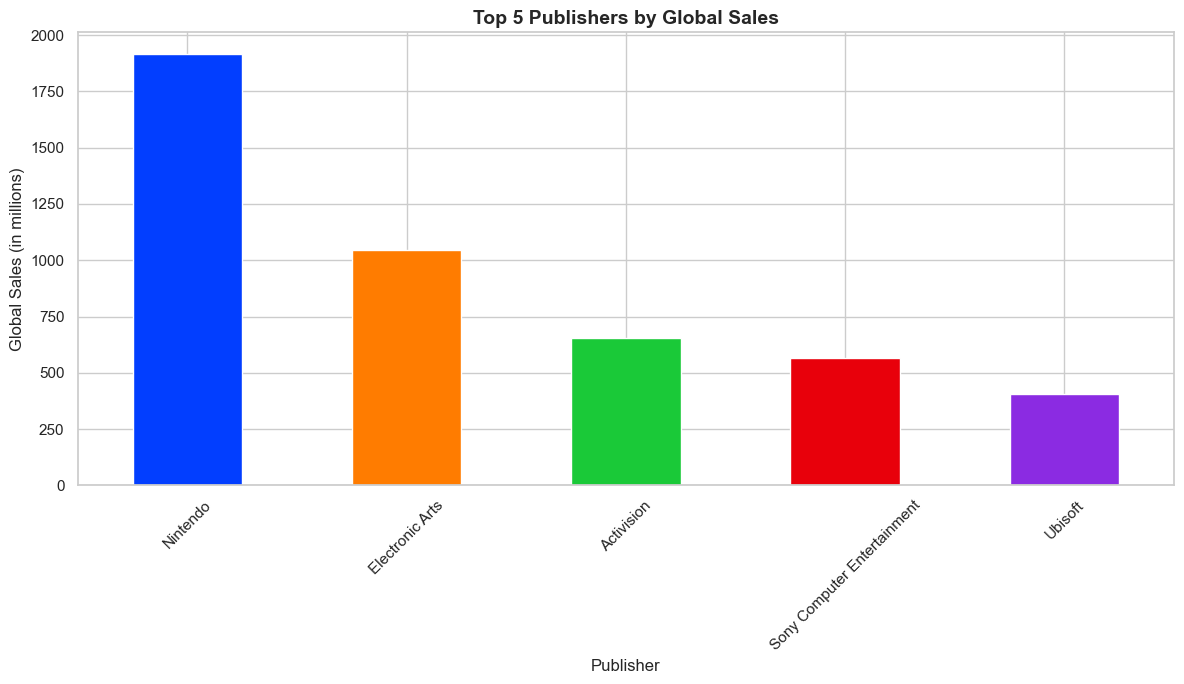

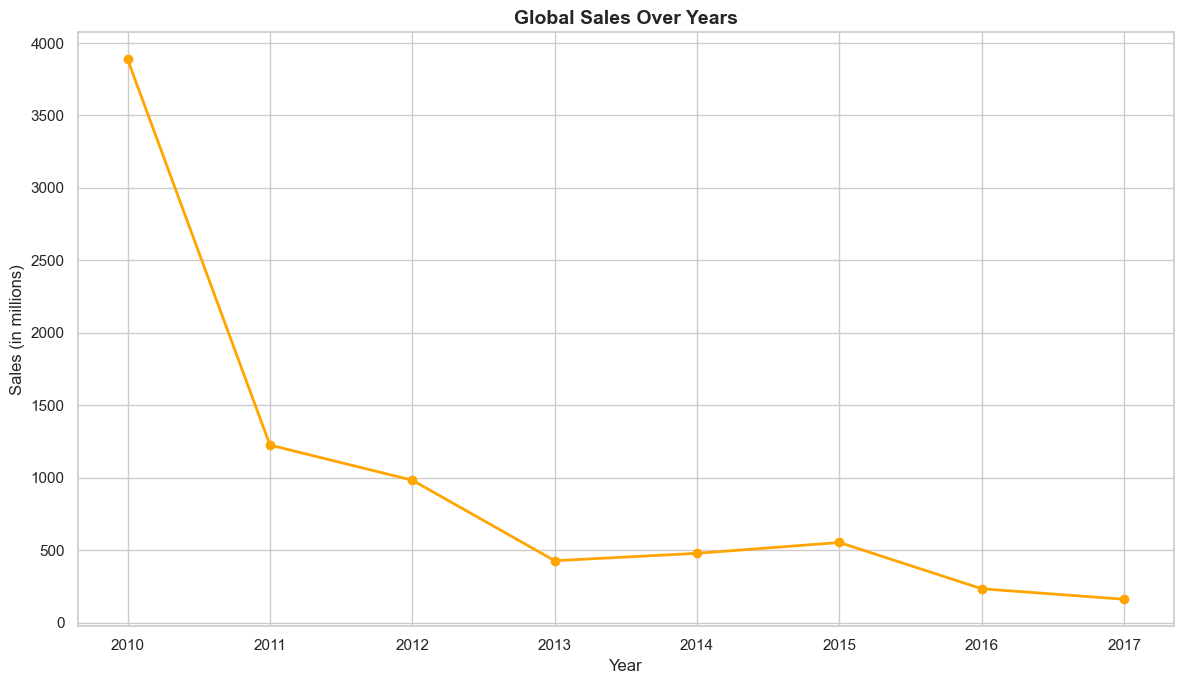

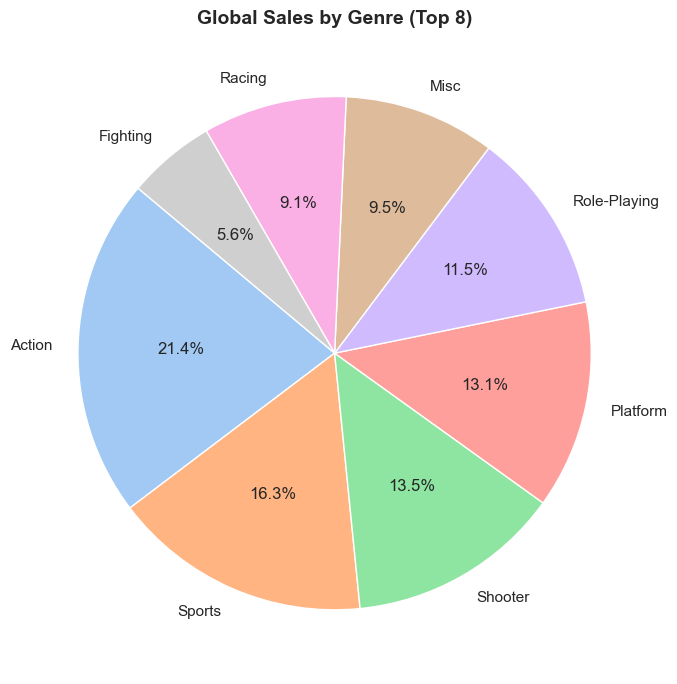

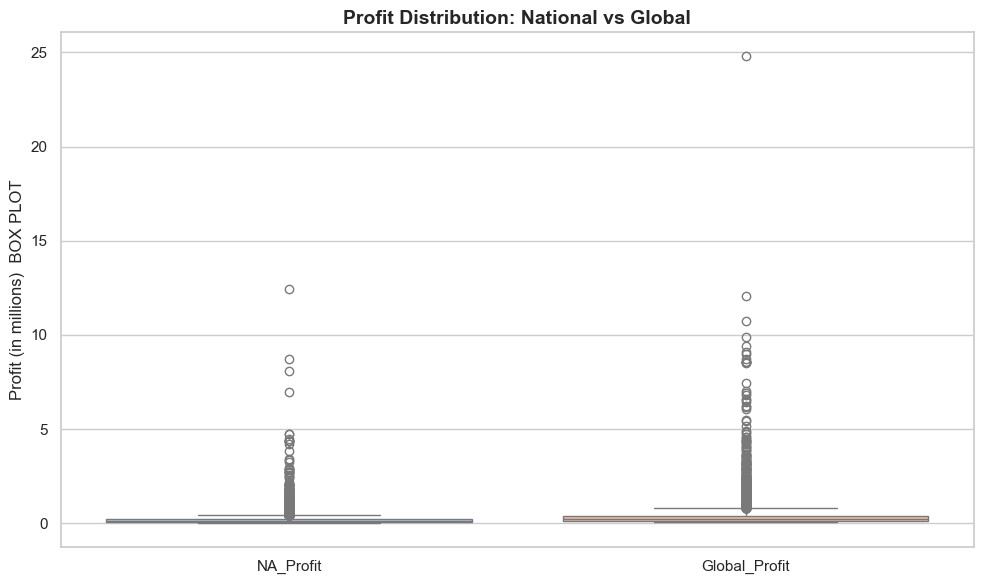

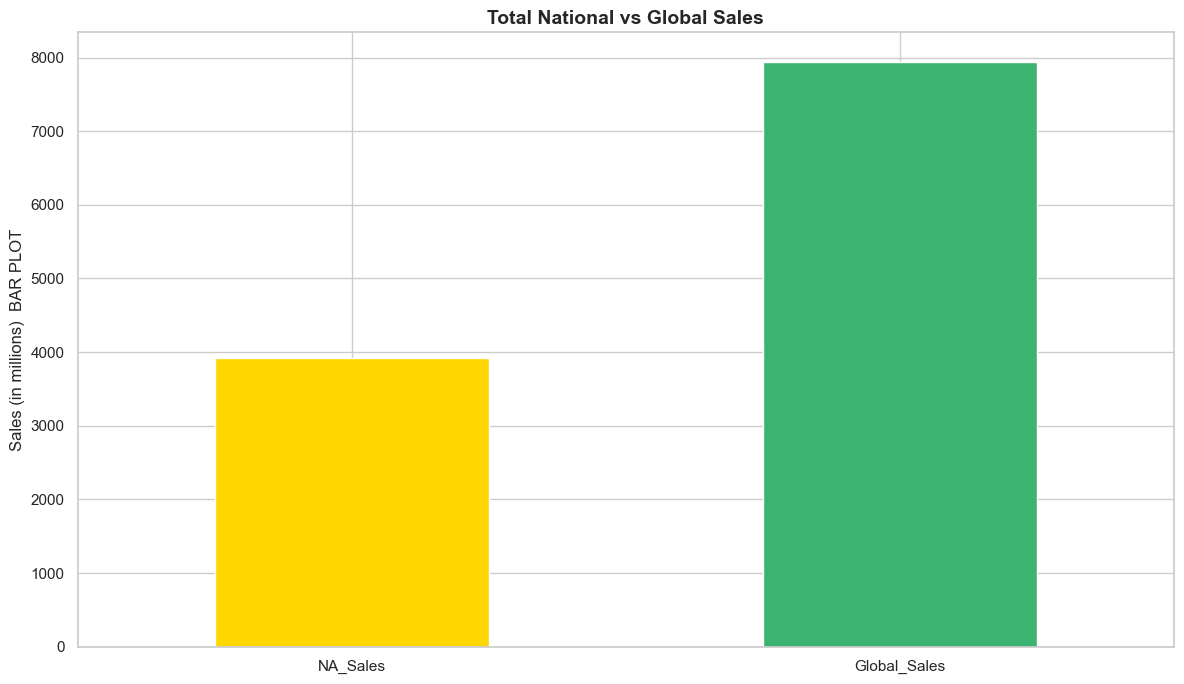

<Figure size 1200x700 with 0 Axes>

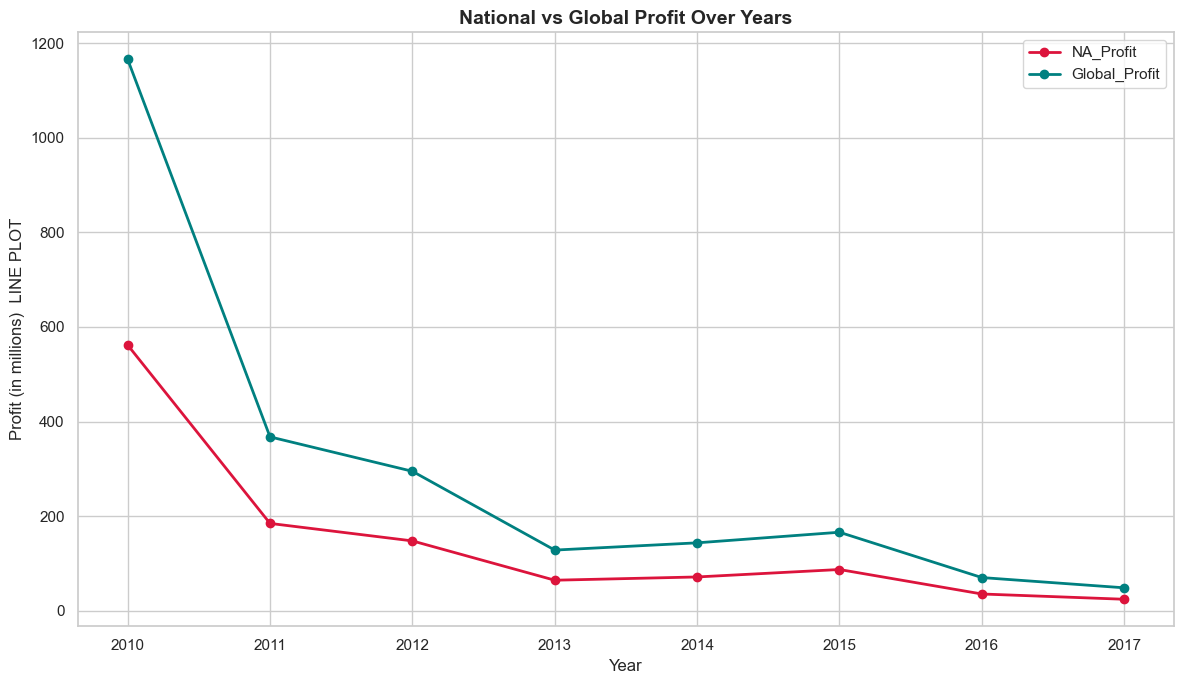

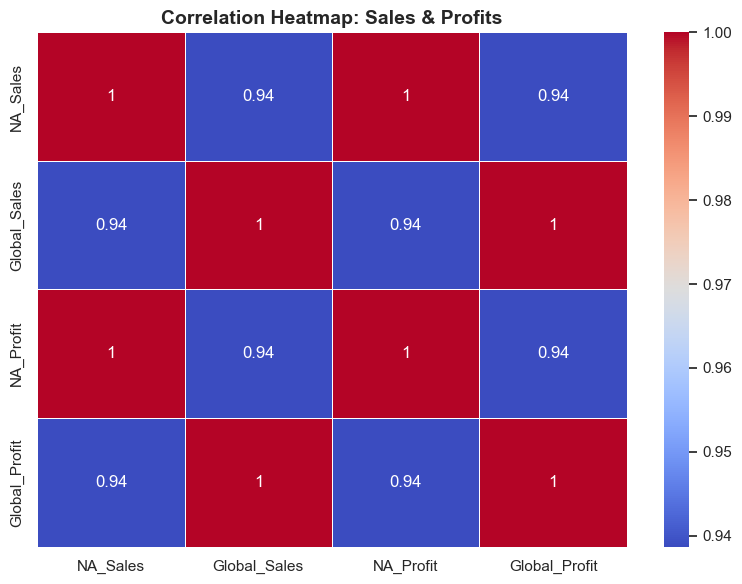

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("VideoGamesSales.csv")

# Clean NA_Sales: remove "$" and convert to float
df['NA_Sales'] = df['NA_Sales'].replace('[\$,]', '', regex=True).astype(float)

# --- EDA ---
print("Missing Values:\n", df.isnull().sum())
print("\nDescriptive Statistics:\n", df.describe())

# Top 5 publishers by global sales
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)

# --- Visualizations ---
sns.set(style="whitegrid")
sns.set_palette("bright")
plt.rcParams["figure.figsize"] = (12, 7)

# 1. Bar Plot: Top 5 Publishers by Global Sales
plt.figure()
top_publishers.plot(kind='bar', color=sns.color_palette("bright", 5))
plt.title("Top 5 Publishers by Global Sales", fontsize=14, weight='bold')
plt.ylabel("Global Sales (in millions)")
plt.xlabel("Publisher")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Line Chart: Global Sales Over Years
plt.figure()
sales_by_year = df.groupby('Year')['Global_Sales'].sum()
sales_by_year.plot(kind='line', marker='o', color='orange', linewidth=2)
plt.title("Global Sales Over Years", fontsize=14, weight='bold')
plt.ylabel("Sales (in millions)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Pie Chart: Genre-wise Sales (Top 8)
plt.figure()
genre_sales = df.groupby('Genre')['Global_Sales'].sum()
genre_sales.sort_values(ascending=False).head(8).plot(
    kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Global Sales by Genre (Top 8)", fontsize=14, weight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()

# 4. Box Plot: National vs Global Profit
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['NA_Profit', 'Global_Profit']], palette="coolwarm")
plt.title("Profit Distribution: National vs Global", fontsize=14, weight='bold')
plt.ylabel("Profit (in millions)  BOX PLOT")
plt.tight_layout()
plt.show()


# 6. Bar Plot: Compare NA Sales and Global Sales
plt.figure()
sales_comparison = df[['NA_Sales', 'Global_Sales']].sum()
sales_comparison.plot(kind='bar', color=['gold', 'mediumseagreen'])
plt.title("Total National vs Global Sales", fontsize=14, weight='bold')
plt.ylabel("Sales (in millions)  BAR PLOT")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 7. Line Chart: National vs Global Profit Over Years
plt.figure()
profit_yearly = df.groupby('Year')[['NA_Profit', 'Global_Profit']].sum()
profit_yearly.plot(marker='o', linewidth=2, color=['crimson', 'teal'])
plt.title("National vs Global Profit Over Years", fontsize=14, weight='bold')
plt.ylabel("Profit (in millions)  LINE PLOT")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Heatmap: Correlation Between Sales and Profits
plt.figure(figsize=(8, 6))
sns.heatmap(df[['NA_Sales', 'Global_Sales', 'NA_Profit', 'Global_Profit']].corr(), 
            annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap: Sales & Profits", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


*Now Apply The Linear Regression And Cross Validation on the Data set *